Grafico de barras de

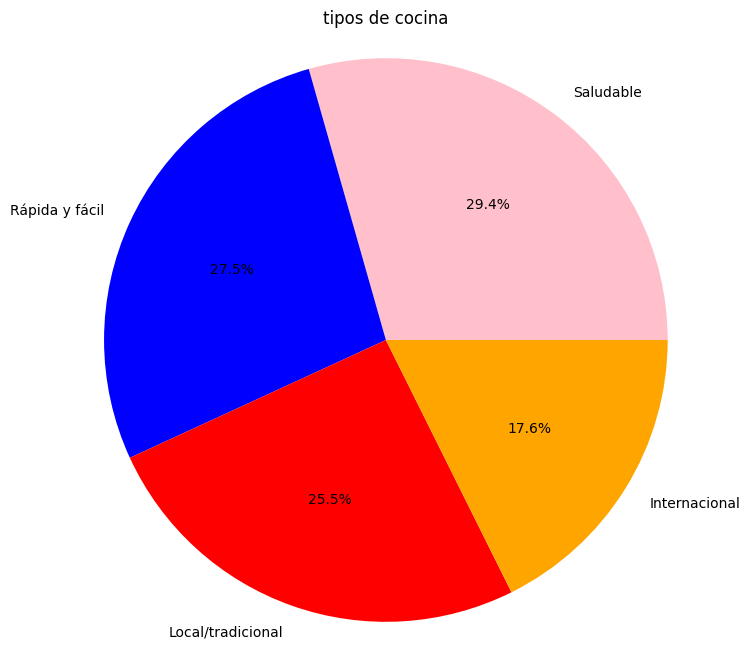

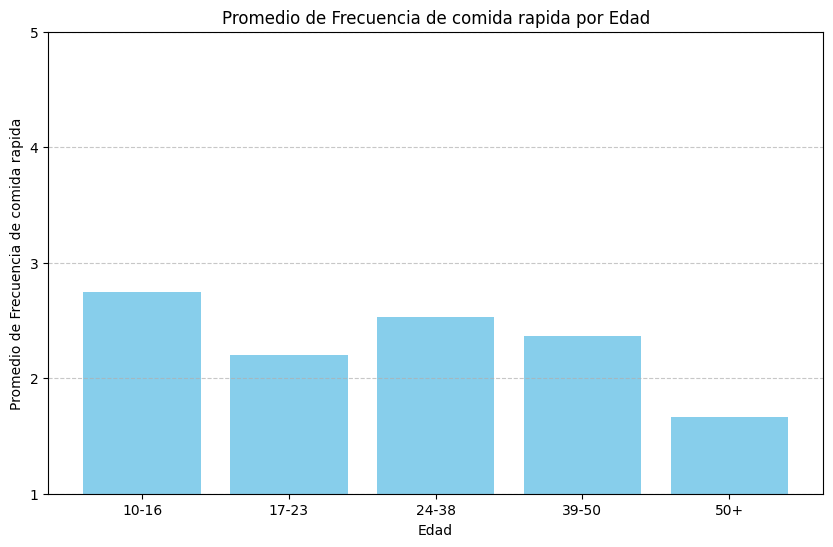

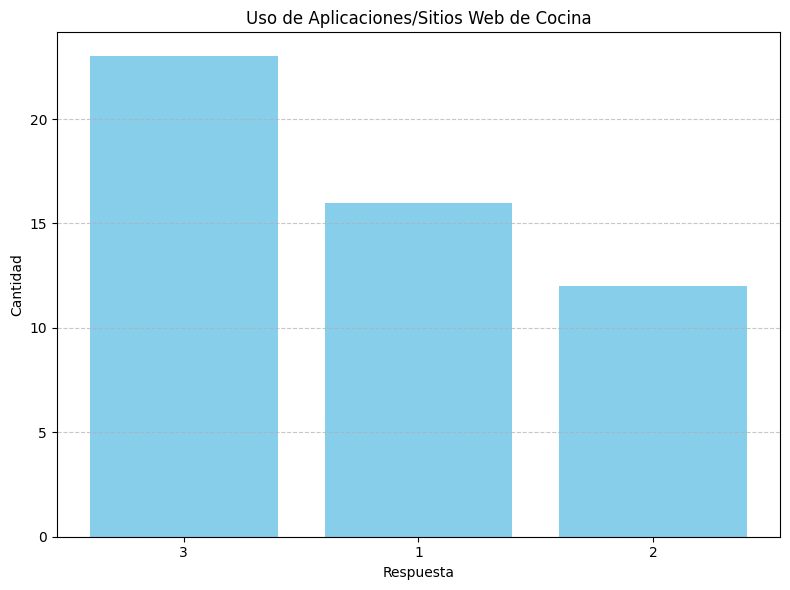

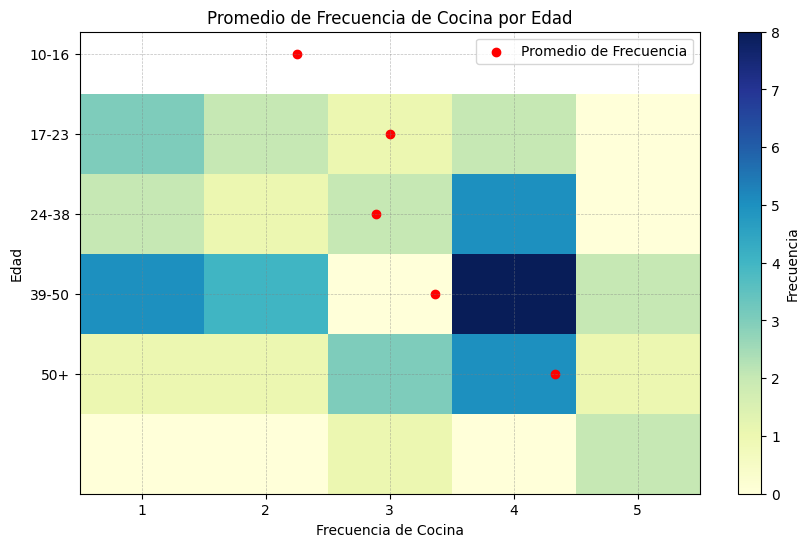

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Asegúrate de importar NumPy


# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/Cocina.csv')

df['¿Con qué frecuencia cocinas en casa?'].replace({
    'Nunca': 1,
    'Ocasionalmente': 2,
    'Una vez a la semana': 3,
    'Varias veces a la semana': 4,
    'Todos los días': 5
}, inplace=True)


#nivel de interes
df['¿Qué tan importante crees que es saber cocinar en la vida cotidiana?'].replace({
    'Nada importante': 1,
    'Poco importante': 2,
    'Neutral': 3,
    'Moderadamente importante': 4,
    'Muy importante': 5
}, inplace=True)



#comida chatarra
df['¿Con qué frecuencia consumes comida rápida o precocinada en lugar de cocinar en casa?'].replace({
    'Nunca': 1,
    'Ocasionalmente': 2,
    'Una vez a la semana': 3,
    'Varias veces a la semana': 4,
    'Todos los días': 5
}, inplace=True)



df['¿Consideras importante la nutrición al preparar tus comidas?'].replace({
    'Nada importante': 1,
    'Poco importante': 2,
    'Neutral': 3,
    'Moderadamente importante': 4,
    'Muy importante': 5
}, inplace=True)


df['¿Sueles seguir recetas o tutoriales al cocinar?'].replace({
    'Nunca': 1,
    'Raramente': 2,
    'A menudo': 3,
    'Siempre': 4
}, inplace=True)



df['¿Utilizas aplicaciones móviles o sitios web relacionados con la cocina para obtener inspiración, recetas o consejos?'].replace({
    'No, nunca': 1,
    'A veces': 2,
    'Sí, regularmente': 3
}, inplace=True)




#grafico torta la frecuancia de comida rapida
df.head()
cuentoSubtipo = df['¿Qué tipo de cocina prefieres preparar?'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cuentoSubtipo, labels=cuentoSubtipo.index, autopct='%1.1f%%', colors=['pink', 'blue','red','orange','green'])
plt.title('tipos de cocina')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

promedio_por_edad2 = df.groupby('Edad')['¿Con qué frecuencia consumes comida rápida o precocinada en lugar de cocinar en casa?'].mean().reset_index()
#grafico barras para saber frecuencia de comida rapida x edad
plt.figure(figsize=(10, 6))
plt.bar(promedio_por_edad2['Edad'], promedio_por_edad2['¿Con qué frecuencia consumes comida rápida o precocinada en lugar de cocinar en casa?'], color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Promedio de Frecuencia de comida rapida')
plt.title('Promedio de Frecuencia de comida rapida por Edad')
plt.xticks(promedio_por_edad2['Edad'])
plt.ylim(1, 5)

# Especificar las marcas en el eje y como enteros
plt.yticks(range(1, 6))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# gráfico de barras de inspiracion de la cocina
respuestas_counts = df['¿Utilizas aplicaciones móviles o sitios web relacionados con la cocina para obtener inspiración, recetas o consejos?'].value_counts()

plt.figure(figsize=(8, 6))
posiciones = range(1, len(respuestas_counts.index)+1)
plt.bar(posiciones, respuestas_counts.values, color='skyblue')
plt.xticks(posiciones, respuestas_counts.index)

plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.title('Uso de Aplicaciones/Sitios Web de Cocina')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

matriz_frecuencia = df.pivot_table(index='Edad', columns='¿Con qué frecuencia cocinas en casa?', aggfunc='size', fill_value=0)


promedio_por_edad = df.groupby('Edad')['¿Con qué frecuencia cocinas en casa?'].mean().reset_index()
# Extraigo los valores de edad y promedio de frecuencia
edades = promedio_por_edad['Edad']
promedio_frecuencia = promedio_por_edad['¿Con qué frecuencia cocinas en casa?']

# Creo el gráfico de calor
# Crear el gráfico de calor
plt.figure(figsize=(10, 6))

# Graficar la matriz de frecuencia
plt.imshow(matriz_frecuencia, cmap='YlGnBu', aspect='auto', extent=[0.5, 5.5, len(edades)+0.5, 0.5])

# Añadir la barra de color
plt.colorbar(label='Frecuencia')

# Graficar los puntos de promedio de frecuencia
plt.scatter(promedio_frecuencia, edades, color='red', marker='o', label='Promedio de Frecuencia')

# Etiquetas y título
plt.xlabel('Frecuencia de Cocina')
plt.ylabel('Edad')
plt.title('Promedio de Frecuencia de Cocina por Edad')

# Establecer las etiquetas de las edades
plt.yticks(range(len(edades)), edades)

# Mostrar la leyenda
plt.legend()

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Mostrar el gráfico
plt.show()

